In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Read the CSV file
df1 = pd.read_csv('1trump_news.csv')
df2 = pd.read_csv('2trump_news.csv')
df3 = pd.read_csv('3trump_news.csv')
df4 = pd.read_csv('4trump_news.csv')
df5 = pd.read_csv('5trump_news.csv')   
df6 = pd.read_csv('6trump_news.csv')
df7 = pd.read_csv('7trump_news.csv')
 
#Poner todos los DFs en una lista
dfs = [df1, df2, df3, df4, df5, df6, df7]
df_total = pd.concat(dfs, ignore_index=True)
df_total['date'] = pd.to_datetime(df_total['date'], format='%d.%m.%y', errors='coerce')


print(df_total.info())
print(df_total.describe())  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30074 entries, 0 to 30073
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30074 non-null  datetime64[ns]
 1   title   30074 non-null  object        
 2   source  30074 non-null  object        
 3   link    30074 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 939.9+ KB
None
                                date
count                          30074
mean   2024-02-13 01:34:25.385382912
min              2022-12-28 00:00:00
25%              2023-06-29 00:00:00
50%              2024-02-07 00:00:00
75%              2024-09-15 00:00:00
max              2025-03-31 00:00:00


In [59]:
# ===============================
# Create 'year_month' and 'day' columns
# ===============================
df_total['year_month'] = df_total['date'].dt.to_period('M')  # Example: 2024-02
df_total['day'] = df_total['date'].dt.day                   # Day of the month (1-31)

# ===============================
# Create the pivot table
# ===============================
cross_table = pd.pivot_table(
    df_total,
    index='day',           # Rows: day of the month
    columns='year_month',  # Columns: year and month
    values='title',        # Count based on 'title'
    aggfunc='count',       # Aggregation: count how many articles
    fill_value=0           # Fill empty cells with 0
)

# ===============================
# Split pivot table by year
# ===============================

# Select columns that belong to each year
cross_table_2022 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2022)]
cross_table_2023 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2023)]
cross_table_2024 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2024)]
cross_table_2025 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2025)]

# ===============================
# Display each year's table
# ===============================

print("\n📅 Cross Table for 2023:")
print(cross_table_2023)

print("\n📅 Cross Table for 2024:")
print(cross_table_2024)

print("\n📅 Cross Table for 2025:")
print(cross_table_2025)


📅 Cross Table for 2023:
year_month  2023-01  2023-02  2023-03  2023-04  2023-05  2023-06  2023-07  \
day                                                                         
1                33       33       33       33       33       66       66   
2                33       33       33       33       33       66       33   
3                33       33       33       33       33       66       33   
4                33       33       33       33       33       66       33   
5                33       33       33       33       33       66       33   
6                33       33       33       33       33       66       33   
7                33       33       33       33       33       66       33   
8                33       33       33       33       33       66       33   
9                33       33       33       33       33       66       33   
10               33       33       33       33       33       66       33   
11               33       33       33       33     

In [60]:
# ===============================
# Check for duplicates
# ===============================
duplicates = df_total.duplicated()

# How many duplicates?
num_duplicates = duplicates.sum()
print(f"🔍 Number of duplicate rows found: {num_duplicates}")

# ===============================
# Remove duplicates
# ===============================
df_total2 = df_total.drop_duplicates()

print(f"✅ After removing duplicates, the DataFrame has {len(df_total)} rows.")


🔍 Number of duplicate rows found: 2084
✅ After removing duplicates, the DataFrame has 30074 rows.


In [53]:
# ===============================
# Create 'year_month' and 'day' columns
# ===============================
df_total2['year_month'] = df_total2['date'].dt.to_period('M')  # Example: 2024-02
df_total2['day'] = df_total2['date'].dt.day                   # Day of the month (1-31)

# ===============================
# Create the pivot table
# ===============================
cross_table = pd.pivot_table(
    df_total2,
    index='day',           # Rows: day of the month
    columns='year_month',  # Columns: year and month
    values='title',        # Count based on 'title'
    aggfunc='count',       # Aggregation: count how many articles
    fill_value=0           # Fill empty cells with 0
)

# ===============================
# Split tables by year
# ===============================

# Select columns that belong to each year
cross_table_2022 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2022)]
cross_table_2023 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2023)]
cross_table_2024 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2024)]
cross_table_2025 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2025)]

# ===============================
# Display each year separately
# ===============================

print("\n📅 Cross Table for 2022:")
print(cross_table_2022)

print("\n📅 Cross Table for 2023:")
print(cross_table_2023)

print("\n📅 Cross Table for 2024:")
print(cross_table_2024)

print("\n📅 Cross Table for 2025:")
print(cross_table_2025)



📅 Cross Table for 2022:
year_month  2022-12
day                
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28               33
29               33
30               33
31               28

📅 Cross Table for 2023:
year_month  2023-01  2023-02  2023-03  2023-04  2023-05  2023-06  2023-07  \
day                                                                         
1                33       33       33       27       33       35       55   
2                33       33       33       33       33    

C:\Users\User\AppData\Local\Temp\ipykernel_5980\4083497098.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total2['year_month'] = df_total2['date'].dt.to_period('M')  # Example: 2024-02
C:\Users\User\AppData\Local\Temp\ipykernel_5980\4083497098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total2['day'] = df_total2['date'].dt.day                   # Day of the month (1-31)


In [61]:
# count the number of articles per month
df_total2['month'] = df_total2['date'].dt.to_period('M')
df_total2['month'] = df_total2['month'].dt.to_timestamp()
# Count the number of articles per month
articles_per_month = df_total2['month'].value_counts().sort_index()

# print the number of articles per month
print("Number of articles per month:")
print(articles_per_month)

Number of articles per month:
month
2022-12-01     127
2023-01-01     988
2023-02-01     866
2023-03-01     971
2023-04-01     930
2023-05-01    1316
2023-06-01    1699
2023-07-01     990
2023-08-01     958
2023-09-01     941
2023-10-01     991
2023-11-01     951
2023-12-01     959
2024-01-01    1034
2024-02-01     937
2024-03-01     979
2024-04-01     991
2024-05-01     981
2024-06-01     986
2024-07-01     997
2024-08-01     991
2024-09-01     960
2024-10-01    1007
2024-11-01     948
2024-12-01    1008
2025-01-01    1197
2025-02-01    1056
2025-03-01    1231
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_5980\4200679886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total2['month'] = df_total2['date'].dt.to_period('M')
C:\Users\User\AppData\Local\Temp\ipykernel_5980\4200679886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total2['month'] = df_total2['month'].dt.to_timestamp()


Number of articles per month for each source:
month                  2022-12-01  2023-01-01  2023-02-01  2023-03-01  \
source                                                                  
ABC News                       10         137          77         121   
Al Jazeera                     17          69          93          87   
Associated Press (AP)           6          49          64          63   
BBC                             0          75          90         108   
CBS News                        2         185          72         113   
FOX News                       20         156         103          60   
NBC                            36          83         116         106   
NPR                            12         100         163         126   
The New York Post               4          29          48          38   
The New York Times             20         105          40         149   

month                  2023-04-01  2023-05-01  2023-06-01  2023-07-01  \
sour

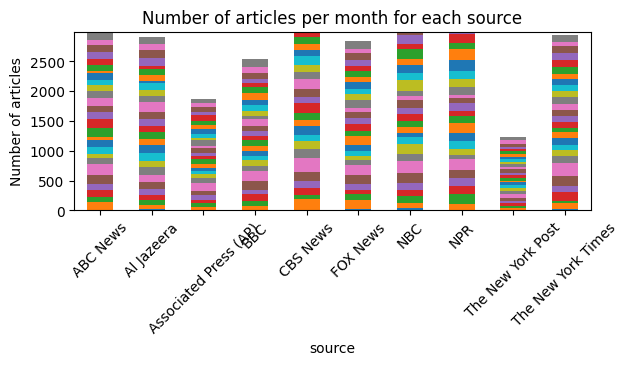

In [63]:
# Count the number of articles per month for each source
articles_per_month_source = df_total2.groupby(['source', 'month']).size().unstack(fill_value=0)
# print the number of articles per month for each source
print("Number of articles per month for each source:")
print(articles_per_month_source)
# Plot the number of articles per month for each source
import matplotlib.pyplot as plt
articles_per_month_source.plot(kind='bar', stacked=True)
plt.title('Number of articles per month for each source')
# plt.xlabel('Month')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
# plt.legend(title='Source')
plt.ylim(0, 3000)  # <-- Set Y-axis limits from 0 to 2500
plt.yticks(range(0, 2501, 500))  # <-- Set Y-axis ticks every 500
plt.tight_layout()
plt.legend([], frameon=False, fontsize=8)
plt.show()

In [65]:
df_total2['date'] = pd.to_datetime(df_total2['date'], format='%d.%m.%y', errors='coerce')

#Ordenar por fecha (de más antiguo a más reciente)
# ===============================
df_total2 = df_total2.sort_values(by='date')

# ===============================
# Imprimir información
# ===============================
# Número total de filas
total_rows = len(df_total2)
print(f"🔢 Total de filas: {total_rows}")

# Verificar datos faltantes
missing_data = df_total2.isnull().sum()
print("\n🔍 Conteo de valores faltantes por columna:")
print(missing_data)


🔢 Total de filas: 27990

🔍 Conteo de valores faltantes por columna:
date          0
title         0
source        0
link          0
year_month    0
day           0
month         0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_5980\3517553297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total2['date'] = pd.to_datetime(df_total2['date'], format='%d.%m.%y', errors='coerce')


In [66]:
# ===============================
# Salvar el archivo
# ===============================
df_total2.to_csv('news_trump_total.csv', index=False)
print("\n✅ Archivo 'news_trump_total.csv' guardado correctamente.")


✅ Archivo 'news_trump_total.csv' guardado correctamente.


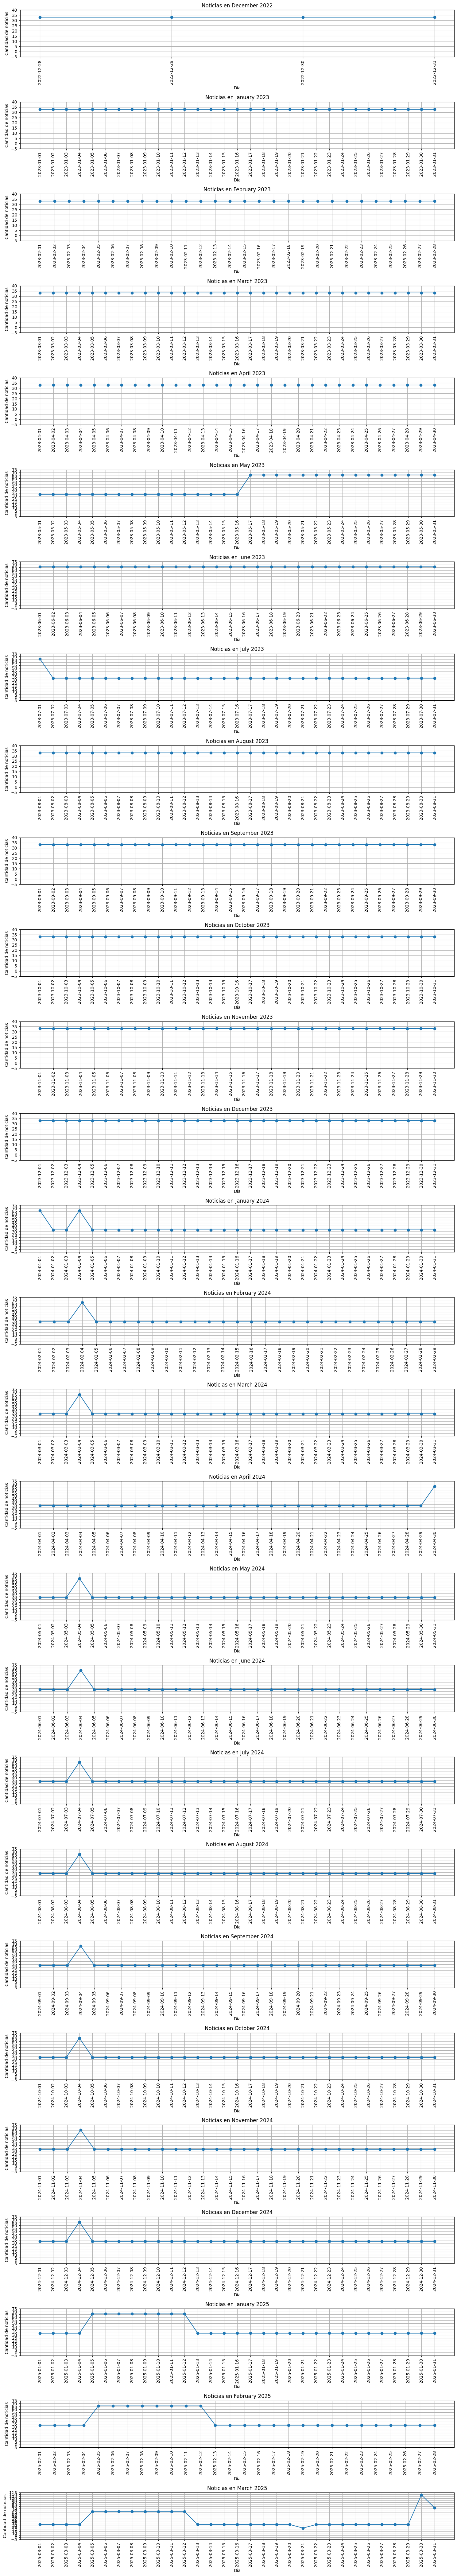

In [64]:
df_total['date'] = pd.to_datetime(df_total['date'], format='%d.%m.%y', errors='coerce')
# Crear el rango completo de fechas
fecha_inicio = pd.to_datetime('2022-12-28')
fecha_fin = pd.to_datetime('2025-03-31')
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin)

# Contar cuántos registros hay por fecha en el DataFrame total
conteo_por_fecha = df_total['date'].value_counts()

# Crear un conteo completo asegurando todas las fechas del rango
conteo_completo = pd.Series(0, index=rango_fechas)
conteo_completo.update(conteo_por_fecha)

# Ordenar el índice de fechas
conteo_completo = conteo_completo.sort_index()

# Crear un DataFrame con las fechas y el conteo
conteo_df = conteo_completo.reset_index()
conteo_df.columns = ['date', 'count']

# Crear una columna de año y mes para agrupar
conteo_df['year_month'] = conteo_df['date'].dt.to_period('M')

# Obtener lista única de meses
unique_months = conteo_df['year_month'].unique()

# Crear los subplots: uno por mes
fig, axs = plt.subplots(len(unique_months), 1, figsize=(15, len(unique_months)*3), sharex=False)

if len(unique_months) == 1:
    axs = [axs]  # En caso de que haya solo un subplot

# Graficar cada mes separado
for i, ym in enumerate(unique_months):
    start_date = ym.start_time
    end_date = ym.end_time
    
    mask = (conteo_df['date'] >= start_date) & (conteo_df['date'] <= end_date)
    data = conteo_df.loc[mask]
    
    axs[i].plot(data['date'], data['count'], marker='o', linestyle='-')
    axs[i].set_title(f"Noticias en {start_date.strftime('%B %Y')}")
    axs[i].set_xlabel('Día')
    axs[i].set_ylabel('Cantidad de noticias')
    axs[i].set_xticks(data['date'])  # Mostrar cada día
    axs[i].tick_params(axis='x', rotation=90)  # Rotar las fechas para que se vean
    axs[i].grid(True)

# Ajustes de Eje Y
    axs[i].set_ylim(-5, data['count'].max() + 5)  # Comenzar en -5 para que se vea bien el 0
    axs[i].set_yticks(np.arange(-5, data['count'].max() + 10, 5))  # Ticks cada 5 unidades

plt.tight_layout()
plt.show()

#news_trump_total.csv

In [ ]:
# ===============================
# Asegurar que la columna de fecha sea tipo datetime
# ===============================
df_total['date'] = pd.to_datetime(df_total['date'], errors='coerce')



In [3]:
df7 = pd.read_csv('news_trump_totalCARLOS_V1.csv')
 

df7['date'] = pd.to_datetime(df7['date'], format='%d.%m.%y', errors='coerce')


print(df7.info())
print(df7.describe())

# ===============================
# Create 'year_month' and 'day' columns
# ===============================
df7['year_month'] = df7['date'].dt.to_period('M')  # Example: 2024-02
df7['day'] = df7['date'].dt.day                   # Day of the month (1-31)

# ===============================
# Create the pivot table
# ===============================
cross_table = pd.pivot_table(
    df7,
    index='day',           # Rows: day of the month
    columns='year_month',  # Columns: year and month
    values='title',        # Count based on 'title'
    aggfunc='count',       # Aggregation: count how many articles
    fill_value=0           # Fill empty cells with 0
)

# ===============================
# Split pivot table by year
# ===============================

# Select columns that belong to each year
cross_table_2022 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2022)]
cross_table_2023 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2023)]
cross_table_2024 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2024)]
cross_table_2025 = cross_table.loc[:, cross_table.columns.map(lambda x: x.year == 2025)]

# ===============================
# Display each year's table
# ===============================

print("\n📅 Cross Table for 2023:")
print(cross_table_2023)

print("\n📅 Cross Table for 2024:")
print(cross_table_2024)

print("\n📅 Cross Table for 2025:")
print(cross_table_2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        0 non-null      datetime64[ns]
 1   title       6440 non-null   object        
 2   source      6440 non-null   object        
 3   link        6440 non-null   object        
 4   year_month  6440 non-null   object        
 5   day         6440 non-null   int64         
 6   month       6440 non-null   object        
 7   content     6440 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 402.6+ KB
None
      date          day
count    0  6440.000000
mean   NaT    15.783851
min    NaT     1.000000
25%    NaT     8.000000
50%    NaT    16.000000
75%    NaT    23.000000
max    NaT    31.000000
std    NaN     8.705168

📅 Cross Table for 2023:
Empty DataFrame
Columns: []
Index: []

📅 Cross Table for 2024:
Empty DataFrame
Columns: []
Index: